In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q rfdetr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 6.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.6/131.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IfPJUdO6avoSx2YoOnyZ")
project = rf.workspace("thanhvnuis").project("midterm-data")
version = project.version(6)
dataset = version.download("coco")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to midterm-Data-6 in coco:: 100%|██████████| 5030/5030 [00:01<00:00, 4760.64it/s]


In [4]:
dataset.location

'/content/midterm-Data-6'

In [10]:
from rfdetr import RFDETRBase
# Correct the typo: RFDERTBase() should be RFDETRBase()
model = RFDETRBase()
history = []

# Add the colon at the end of the function definition
def callback(data):
    history.append(data)

# Change callback2 to callback to use the defined function
model.callbacks["on_fit_epoch_end"].append(callback)

model.train(dataset_dir=dataset.location, epoch=70, batch_size=4, grad_accum_steps= 4, lr=1e-4)

Output hidden; open in https://colab.research.google.com to view.

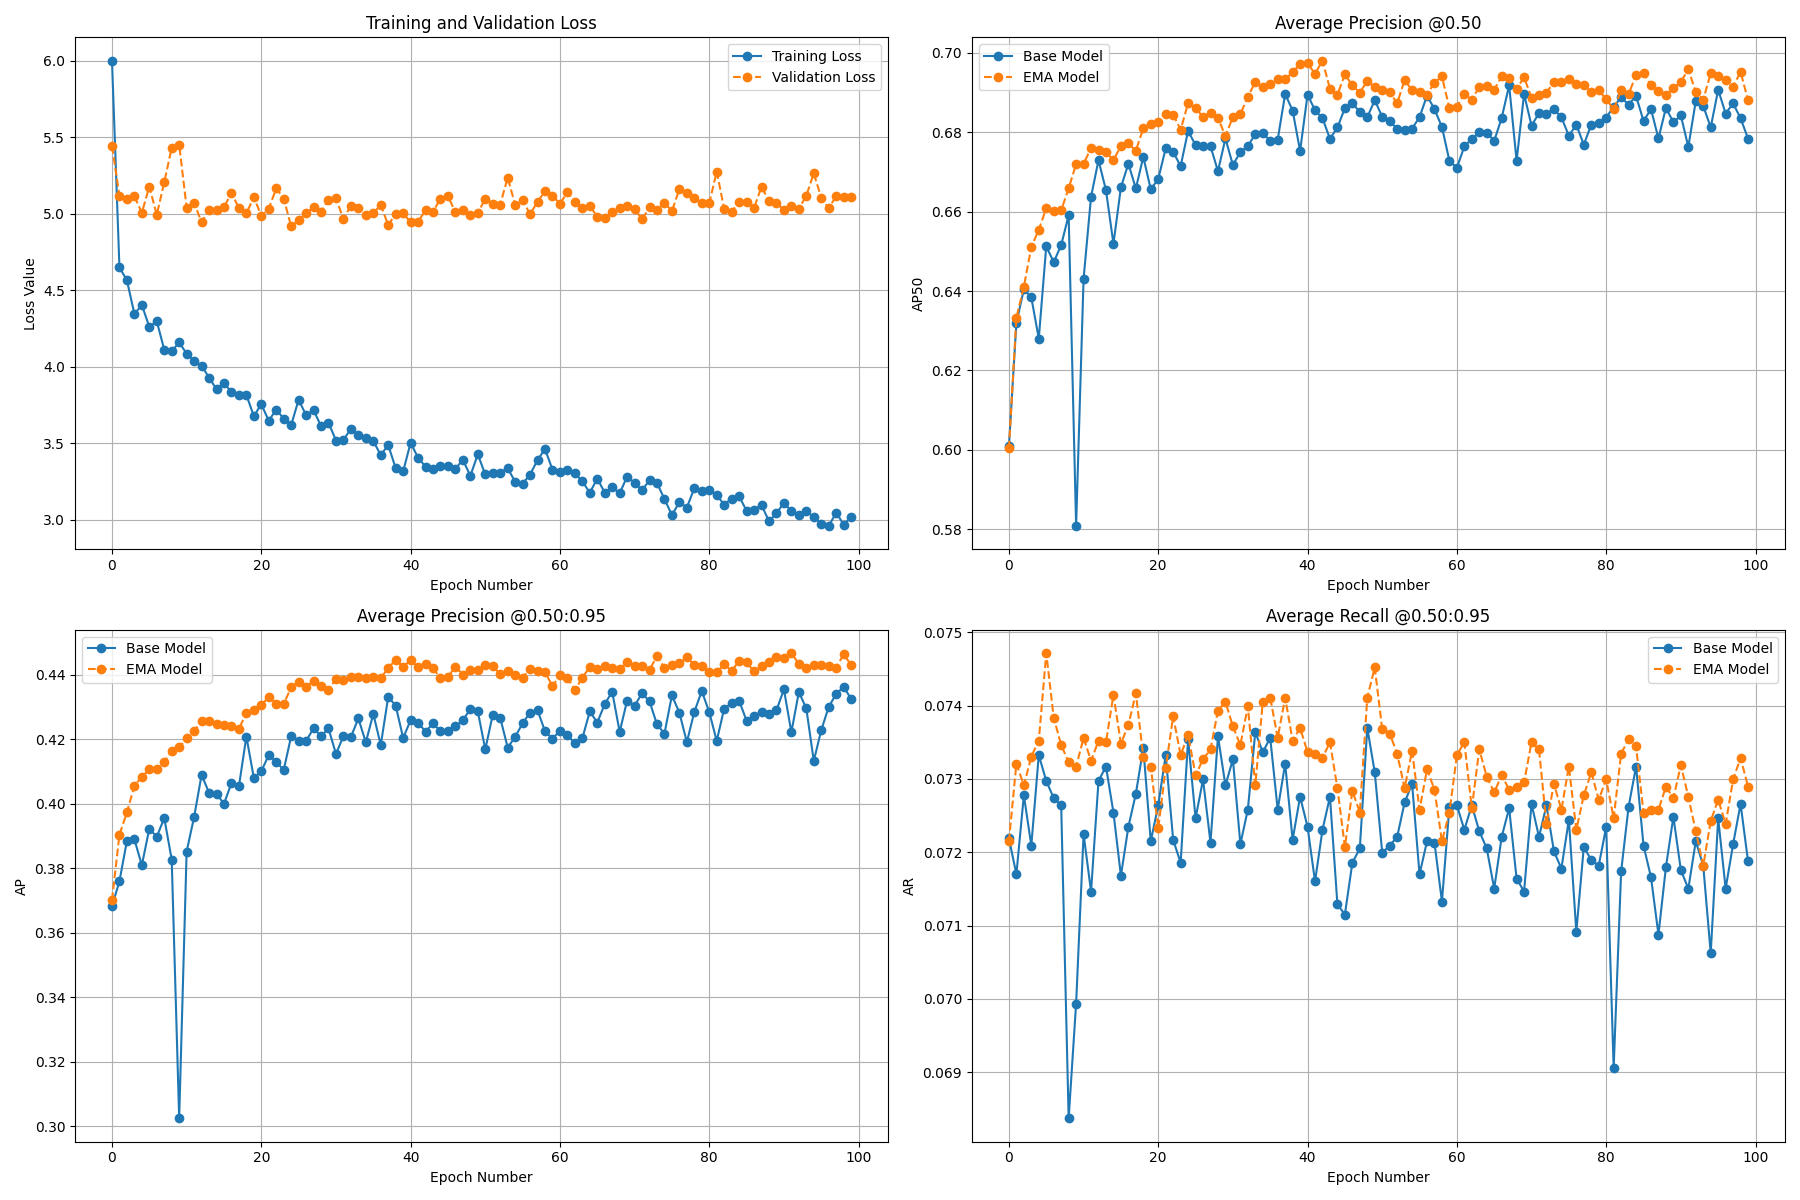

In [11]:
from IPython.display import Image, display

# Hiển thị ảnh biểu đồ đã lưu
display(Image(filename="output/metrics_plot.png", width=800))


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert list of dicts to DataFrame
df = pd.DataFrame(history)

# Hiển thị các cột có trong dữ liệu
print("🧾 Các metric có trong callback:", df.columns.tolist())


🧾 Các metric có trong callback: ['train_lr', 'train_class_error', 'train_loss', 'train_loss_ce', 'train_loss_bbox', 'train_loss_giou', 'train_loss_ce_0', 'train_loss_bbox_0', 'train_loss_giou_0', 'train_loss_ce_1', 'train_loss_bbox_1', 'train_loss_giou_1', 'train_loss_ce_enc', 'train_loss_bbox_enc', 'train_loss_giou_enc', 'train_loss_ce_unscaled', 'train_class_error_unscaled', 'train_loss_bbox_unscaled', 'train_loss_giou_unscaled', 'train_cardinality_error_unscaled', 'train_loss_ce_0_unscaled', 'train_loss_bbox_0_unscaled', 'train_loss_giou_0_unscaled', 'train_cardinality_error_0_unscaled', 'train_loss_ce_1_unscaled', 'train_loss_bbox_1_unscaled', 'train_loss_giou_1_unscaled', 'train_cardinality_error_1_unscaled', 'train_loss_ce_enc_unscaled', 'train_loss_bbox_enc_unscaled', 'train_loss_giou_enc_unscaled', 'train_cardinality_error_enc_unscaled', 'test_class_error', 'test_loss', 'test_loss_ce', 'test_loss_bbox', 'test_loss_giou', 'test_loss_ce_0', 'test_loss_bbox_0', 'test_loss_giou_0',

✅ Inspecting first history item: {'train_lr': 9.99999999999996e-05, 'train_class_error': 1.5570955660753634, 'train_loss': 6.000957755378751, 'train_loss_ce': 0.6257181507108849, 'train_loss_bbox': 0.23077303401771046, 'train_loss_giou': 0.4593289313844709, 'train_loss_ce_0': 0.8237456570178161, 'train_loss_bbox_0': 0.2505983869125555, 'train_loss_giou_0': 0.47938322707082764, 'train_loss_ce_1': 0.6647860416016735, 'train_loss_bbox_1': 0.2313671518294584, 'train_loss_giou_1': 0.4627453535522297, 'train_loss_ce_enc': 0.8433249054592608, 'train_loss_bbox_enc': 0.34804484706658584, 'train_loss_giou_enc': 0.5811420937815865, 'train_loss_ce_unscaled': 0.6257181507108849, 'train_class_error_unscaled': 1.5570955660753634, 'train_loss_bbox_unscaled': 0.04615460683833876, 'train_loss_giou_unscaled': 0.22966446569223545, 'train_cardinality_error_unscaled': 67.82509157509158, 'train_loss_ce_0_unscaled': 0.8237456570178161, 'train_loss_bbox_0_unscaled': 0.05011967730609489, 'train_loss_giou_0_unsc

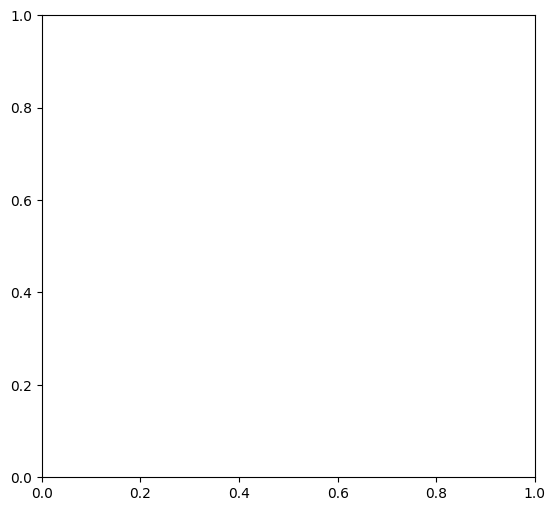

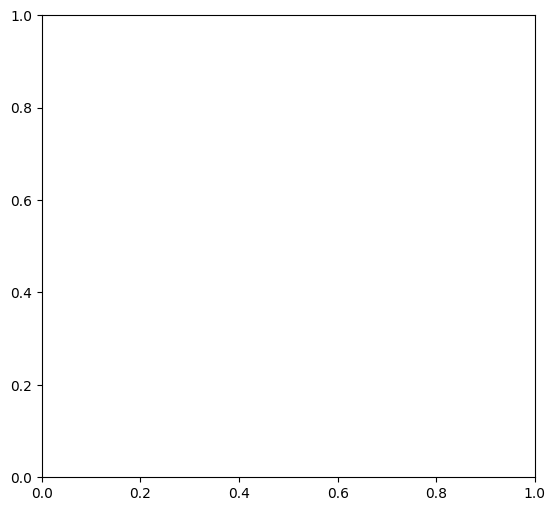

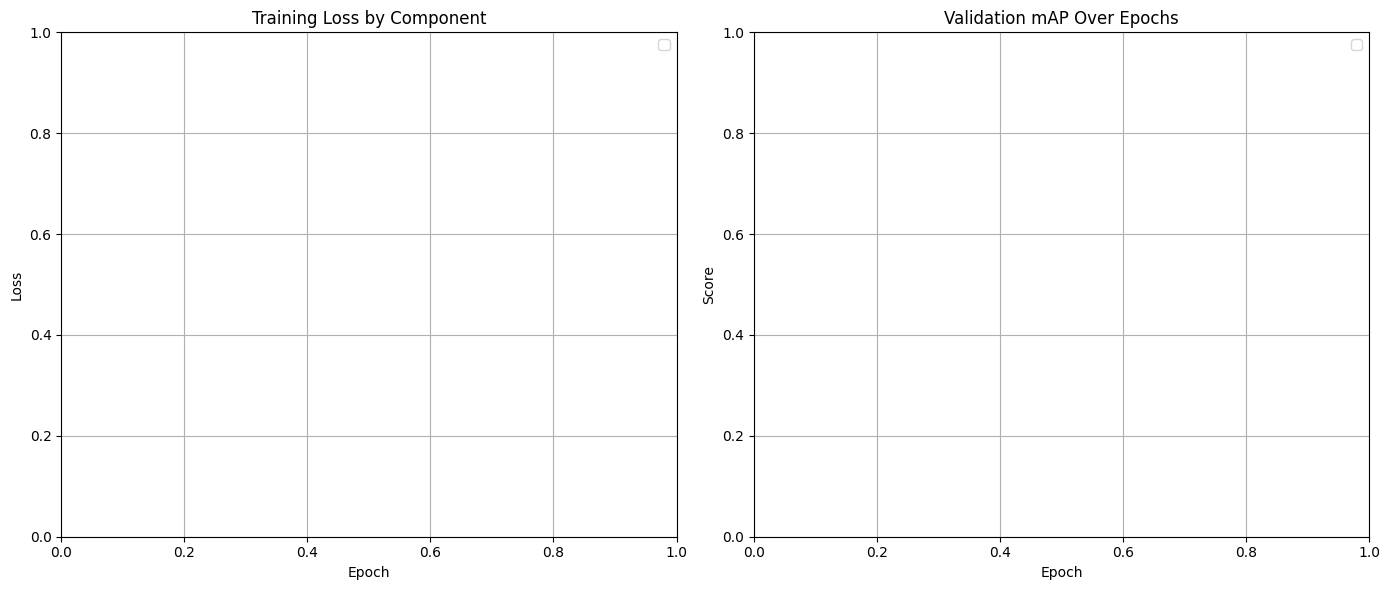

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert list of dicts to DataFrame
# Add a print statement to inspect the first item in history
if history:
    print("✅ Inspecting first history item:", history[0])
else:
    print("⚠️ History list is empty!")

df = pd.DataFrame(history)

# Hiển thị các cột có trong dữ liệu
print("🧾 Các metric có trong callback:", df.columns.tolist())

plt.figure(figsize=(14, 6))

# Biểu đồ Loss
plt.subplot(1, 2, 1)
# Update the column name 'loss' below based on the output of the print statement above
# After running this cell, look at the output of the print statement above
# ("🧾 Các metric có trong callback:") and replace 'loss' with the actual
# column name that represents the total loss from the training output.
# It might be something like 'total_loss' or 'train_loss'.
# Similarly, check 'loss_ce' and 'loss_bbox' for the correct names if they also cause KeyErrors.
try:
    plt.plot(df['epoch'], df['loss'], label="Total Loss", color='blue') # <--- REPLACE 'loss' here
except KeyError:
    print("❌ Column 'loss' not found. Please check the output of df.columns.tolist() above and update the column name for total loss.")
    # As a fallback, you might try other common names if 'loss' doesn't work:
    # plt.plot(df['epoch'], df['train_loss'], label="Total Loss", color='blue')

try:
    plt.plot(df['epoch'], df['loss_ce'], label="Cross Entropy", linestyle='--', color='orange') # <--- REPLACE 'loss_ce' here if needed
except KeyError:
     print("❌ Column 'loss_ce' not found. Please check the output and update the column name.")

try:
    plt.plot(df['epoch'], df['loss_bbox'], label="BBox Loss", linestyle='--', color='green') # <--- REPLACE 'loss_bbox' here if needed
except KeyError:
    print("❌ Column 'loss_bbox' not found. Please check the output and update the column name.")


plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss by Component")
plt.legend()
plt.grid(True)

# Biểu đồ mAP50
plt.subplot(1, 2, 2)
if 'map_50' in df.columns:
    plt.plot(df['epoch'], df['map_50'], label="mAP@0.5", color='purple')
if 'map' in df.columns:
    plt.plot(df['epoch'], df['map'], label="mAP@0.5:0.95", linestyle='--', color='red')
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation mAP Over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
from rfdetr import RFDETRBase
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import os  # Import the os module
import random # Import the random module

# 1. Load mô hình
model = RFDETRBase()
try:
    model.load_weights("output/rf_detr_best.pth")
except AttributeError:
    print("❌ 'RFDETRBase' object has no attribute 'load_weights'. Please check the rfdetr documentation for the correct method to load model weights.")
except FileNotFoundError:
    print("❌ Lỗi: Không tìm thấy file trọng số 'output/rf_detr_best.pth'. Đảm bảo bạn đã train mô hình và file đã được lưu đúng vị trí.")


# 2. Load ảnh test - Lấy ảnh ngẫu nhiên từ thư mục test
# Sử dụng dataset.location để lấy đường dẫn đến thư mục gốc của dataset đã tải về
# và nối thêm đường dẫn tới thư mục ảnh test.
image_dir = os.path.join(dataset.location, "test", "images") # Sử dụng os.path.join để xây dựng đường dẫn độc lập với hệ điều hành

# Lấy danh sách tất cả các file trong thư mục ảnh test
try:
    image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]
except FileNotFoundError:
    print(f"❌ Lỗi: Không tìm thấy thư mục ảnh test: {image_dir}. Hãy kiểm tra xem dataset đã được tải về và giải nén đúng cách chưa.")
    image_files = [] # Đặt danh sách rỗng để tránh lỗi tiếp theo

# Kiểm tra xem thư mục có ảnh nào không
if not image_files:
    print(f"❌ Không tìm thấy file ảnh nào trong thư mục: {image_dir}. Không thể thực hiện dự đoán trên ảnh test.")
else:
    # Chọn ngẫu nhiên một file ảnh từ danh sách
    random_image_name = random.choice(image_files)
    image_path = os.path.join(image_dir, random_image_name) # Tạo đường dẫn đầy đủ đến file ảnh

    print(f"✅ Đang xử lý ảnh ngẫu nhiên: {image_path}")

    try:
        img = Image.open(image_path).convert("RGB")

        # 3. Dự đoán
        model.eval()
        with torch.no_grad():
            results = model.predict(img)

        # 4. Trích xuất bounding boxes
        boxes = results["boxes"]
        scores = results["scores"]
        labels = results["labels"]

        # 5. Đếm số "person" (class_id == 0) và score > threshold
        threshold = 0.3
        person_count = sum((label == 0 and score > threshold) for label, score in zip(labels, scores))

        print(f"✅ Phát hiện {person_count} người trong ảnh.")

        # 6. Hiển thị ảnh và boxes
        plt.figure(figsize=(10, 8))
        plt.imshow(img)
        plt.axis("off")

        for box, label, score in zip(boxes, labels, scores):
            # Assuming class_id 0 is 'person'. You should verify this with your dataset's class mapping.
            if score > threshold and label == 0:
                x1, y1, x2, y2 = box
                plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor='blue', facecolor='none', linewidth=2))
                # You might want to display the class name instead of 'person' if you have the mapping
                plt.text(x1, y1, f'person {score:.2f}', color='white', bbox=dict(facecolor='blue', alpha=0.5))

        plt.title(f"Detected: {person_count} people in {random_image_name}")
        plt.show()

    except FileNotFoundError:
        print(f"❌ Lỗi: Không tìm thấy file ảnh sau khi chọn ngẫu nhiên: {image_path}")
    except Exception as e:
        print(f"❌ Đã xảy ra lỗi khi xử lý ảnh hoặc dự đoán: {e}")

Loading pretrain weights
❌ 'RFDETRBase' object has no attribute 'load_weights'. Please check the rfdetr documentation for the correct method to load model weights.
❌ Lỗi: Không tìm thấy thư mục ảnh test: /content/midterm-Data-6/test/images. Hãy kiểm tra xem dataset đã được tải về và giải nén đúng cách chưa.
❌ Không tìm thấy file ảnh nào trong thư mục: /content/midterm-Data-6/test/images. Không thể thực hiện dự đoán trên ảnh test.
